In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

In [3]:
df = pd.read_csv("natural-disaster-risk-by-country-2024.csv")

In [4]:
europe = pd.read_excel(r"C:\\Users\\gusta\\GitHub\\Data501_Project\\European Countries.xlsx")

In [5]:
disaster_risk_world_index = europe.merge(df, left_on="Country", right_on="country", how="left").drop(columns=['country'])

In [13]:
# Quick bar graphs of all of these two get an idea on what the top countries are
disaster_risk_world_index.head()

,Country,Subregion,Poplation,European Union Association,NaturalDisasterRiskWorldRiskIndexTotal2023,NaturalDisasterRiskExposure,NaturalDisasterRiskVulnerablity,NaturalDisasterRiskSusceptibility,NaturalDisasterRiskLackOfAdaptiveCapacities,NaturalDisasterRiskLackOfCopingCapacities
0,Albania,Southeast Europe,2837743,No Association,6.23,2.29,16.95,11.51,37.51,11.28
1,Austria,Central Europe,8917205,European Union (EU),1.15,0.15,8.84,4.44,19.53,7.98
2,Belarus,Eastern Europe,9398861,No Association,0.75,0.05,11.14,6.49,36.57,5.83
3,Belgium,Western Europe,11555997,European Union (EU),5.83,1.84,18.49,8.03,28.91,27.21
4,Bosnia and Herzegovina,Southeast Europe,3280815,No Association,2.63,0.34,20.28,14.13,51.26,11.51


In [42]:
vars = [
    # 'NaturalDisasterRiskWorldRiskIndexTotal2023', 
    'NaturalDisasterRiskExposure', 
    'NaturalDisasterRiskVulnerablity',
    'NaturalDisasterRiskSusceptibility', 
    'NaturalDisasterRiskLackOfAdaptiveCapacities',
    'NaturalDisasterRiskLackOfCopingCapacities'
]

In [23]:
# Function from https://www.geeksforgeeks.org/python-split-camelcase-string-to-individual-strings/
# Edited to return one string rather than a list of strings
import re
 
def camel_case_split(str):
 
    return ' '.join(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', str))

In [ ]:
# Create a 1D heatmap for each country, where the country is on the x-axis
countries = disaster_risk_world_index['Country']

# Define a custom colormap
colors = [(0, 1, 0), (1, 0, 0)]  # G -> R
n_bins = 100  # Number of bins
cmap_name = 'my_list'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

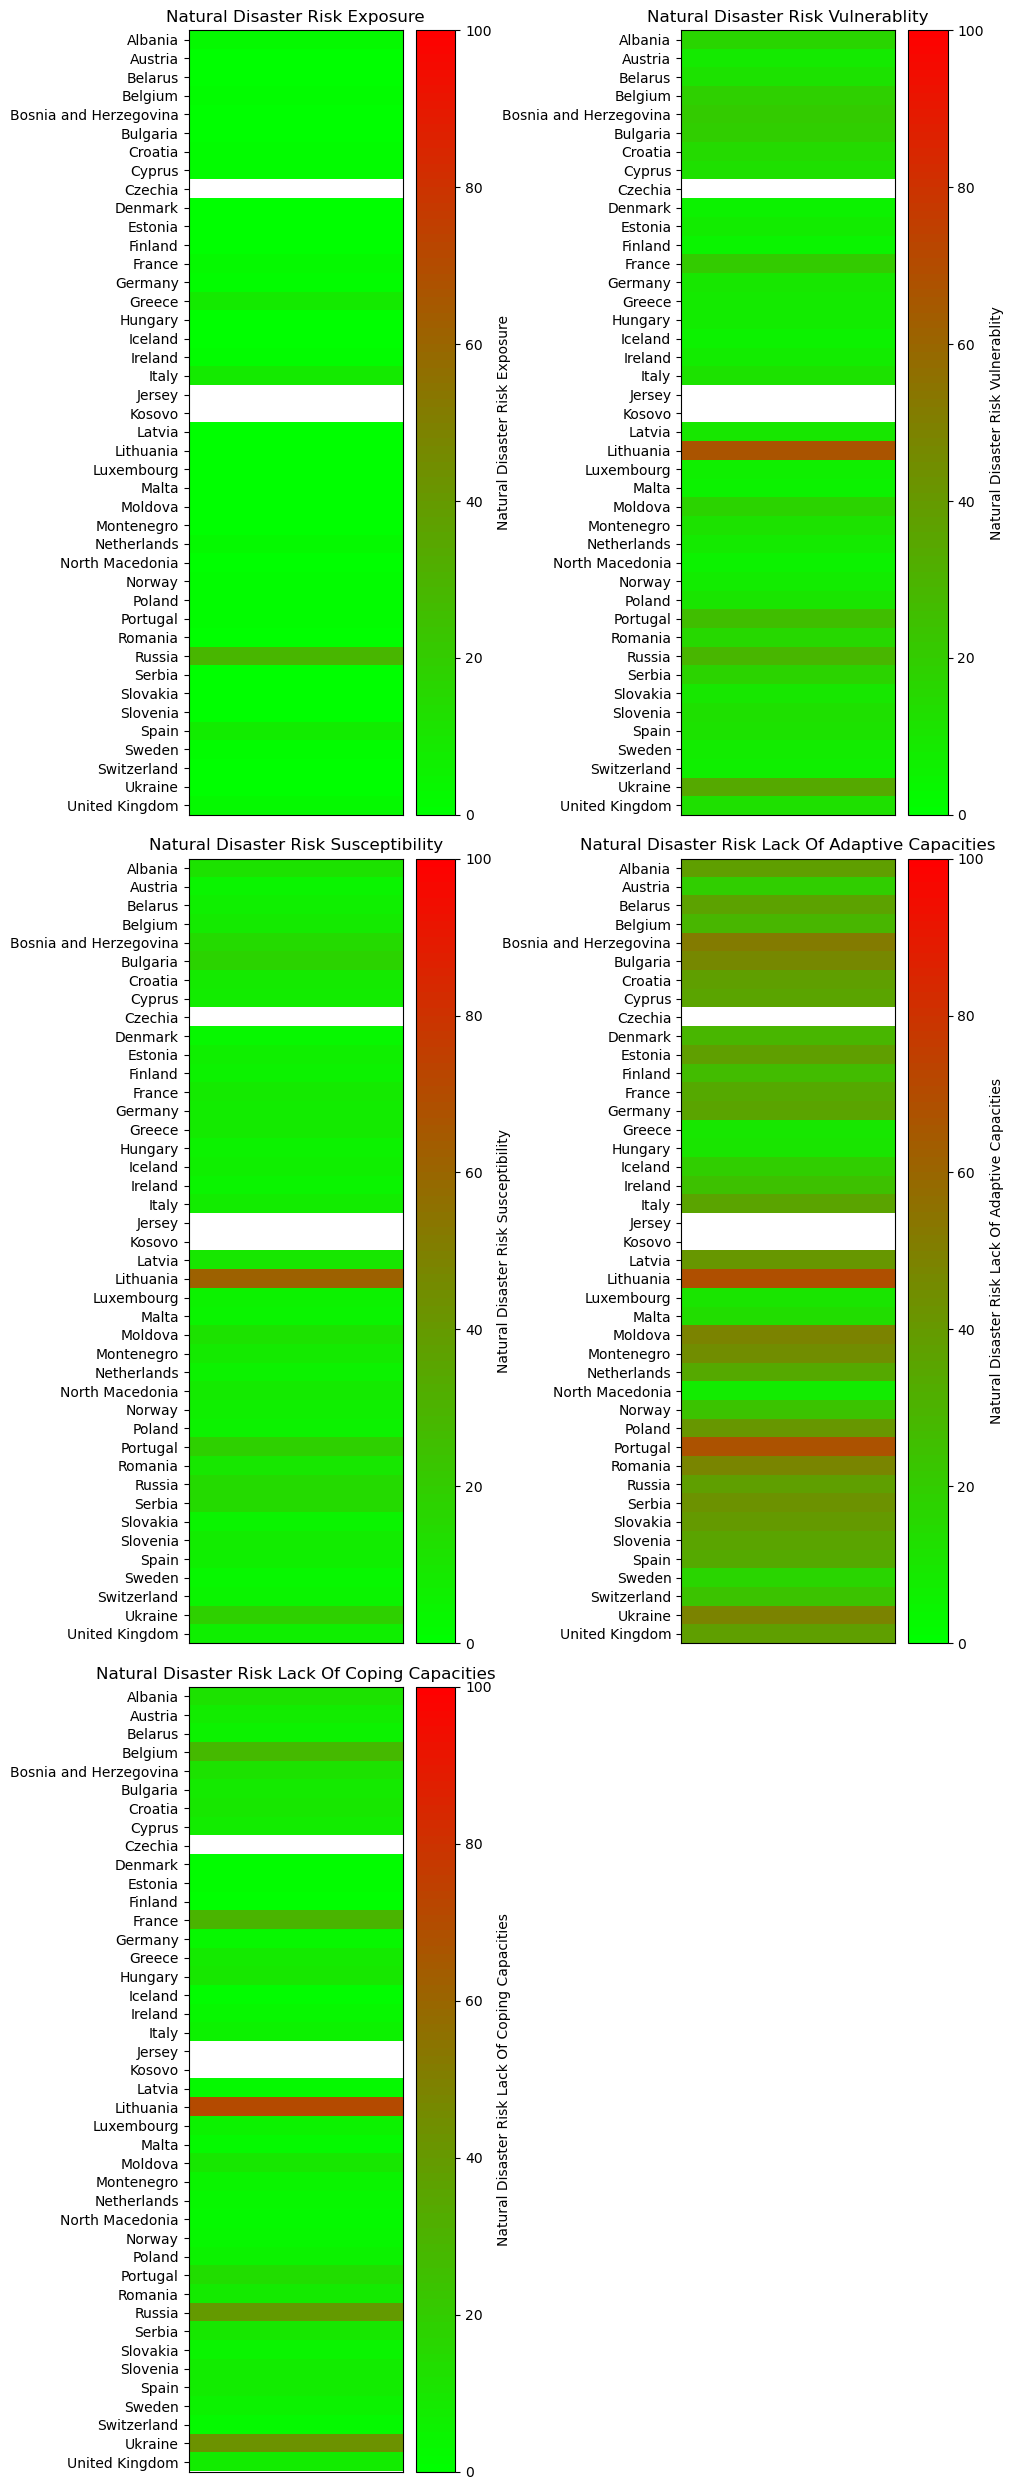

In [46]:
fig, axes = plt.subplots(3, 2, figsize=(10, 25)) 
axes = axes.flatten()

for i, var in enumerate(vars):
    risk_score = disaster_risk_world_index[var]
    hm_data = np.array([risk_score]).T  # Look at each country as an independent row

    # Plotting on the ith subplot
    im = axes[i].imshow(hm_data, cmap=cm, aspect='auto', vmin=0, vmax=100, extent=[0, 1, 0, len(countries)])
    fig.colorbar(im, ax=axes[i], label=camel_case_split(var))  # Add a colorbar to the ith subplot

    # Setting the y-ticks to correspond to countries, in reversed order due to transpose
    axes[i].set_yticks(np.arange(len(countries)) + 0.5)
    axes[i].set_yticklabels(countries[::-1])

    # Removing x-ticks as they don't represent any variable in this orientation
    axes[i].set_xticks([])

    axes[i].set_title(camel_case_split(var)) 

fig.delaxes(axes[-1])
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()